# Handling Outlier

***How to Handle Outliers in Machine Learning***

***The most important phase in Feature Engineering is handling outliers because it ensures that our model is trained on accurate data which leads to accurate models.***

# What is an Outlier

A data point that varies greatly from other results is referred to as an outlier.

An outlier may also be described as an observation in our data that is incorrect or abnormal as compared to other observations.

***I :- If the Data is Normally Distributed***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('LoanApprovalPrediction.csv')
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [16]:
data.shape

(598, 13)

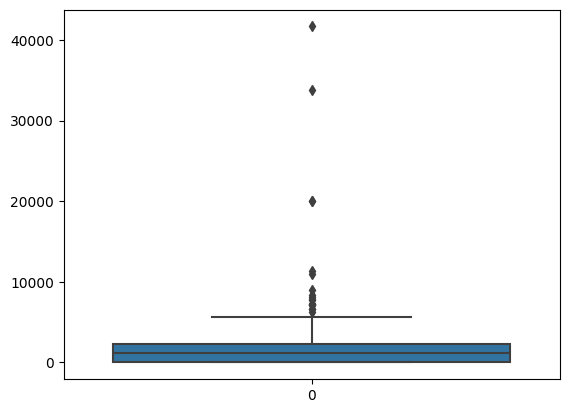

In [8]:
sns.boxplot(data['CoapplicantIncome'])
plt.show()

In [11]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)


IQR = Q3 - Q1
IQR

2324.0

In [12]:
min_range = Q1 - (1.5 * IQR)
max_range = Q3 + (1.5 * IQR)

In [13]:
print(min_range , max_range)

-3486.0 5810.0


In [19]:
new_data = data[data['CoapplicantIncome']<= max_range]

new_data.shape

(580, 13)

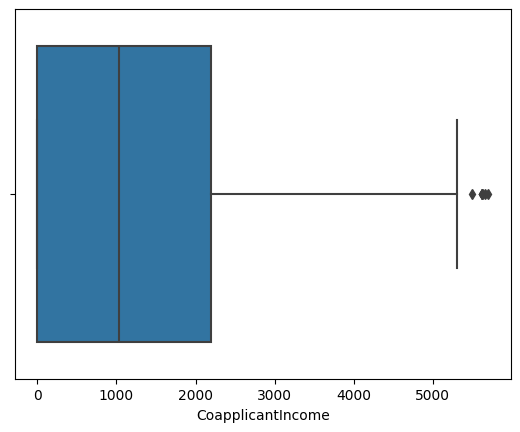

In [21]:
import matplotlib.pyplot as plt
sns.boxplot(x = 'CoapplicantIncome' , data = new_data )
plt.show()

# Z - Score

***The formula for calculating a z-score is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.***

# μ + 3*σ  And  μ - 3*σ

In [22]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [23]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [38]:
data.shape

(598, 13)

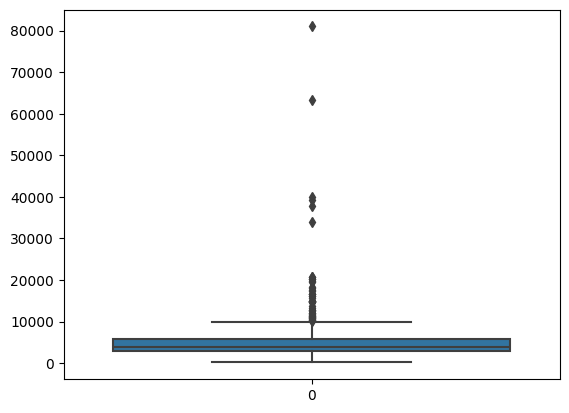

In [25]:
import matplotlib.pyplot as plt
sns.boxplot(data['ApplicantIncome'])
plt.show()

C:\Users\mdaza\AppData\Local\Temp\ipykernel_13976\2841061266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])
c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


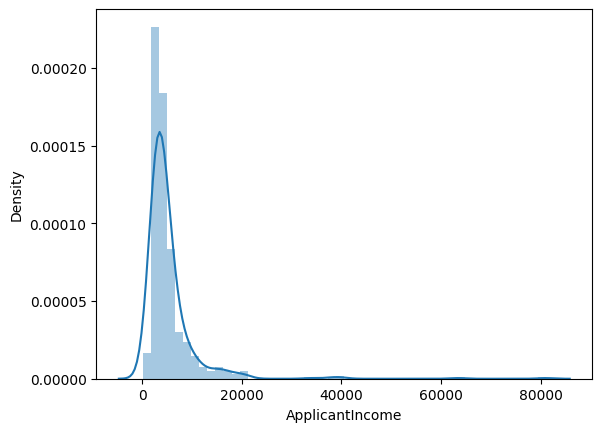

In [26]:
sns.distplot(data['ApplicantIncome'])
plt.show()

In [29]:
max_range = data['ApplicantIncome'].mean() + (3*data['ApplicantIncome'].std())

min_range = data['ApplicantIncome'].mean() - (3*data['ApplicantIncome'].std())

In [30]:
max_range , min_range

(22714.048599991947, -12129.543583269542)

In [34]:
new_datas = data[data['ApplicantIncome'] <= max_range ]

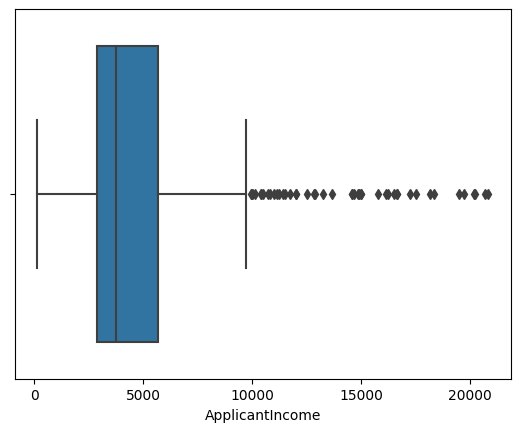

In [37]:
sns.boxplot(x = 'ApplicantIncome' ,  data=new_datas)
plt.show()

In [39]:
new_data.shape

(580, 13)